In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import vonmises, norm, cauchy

from modules.params import *
from modules.potential import *
from modules.aux_functions import *
from modules.free_energy_calc import *
from modules.plot_functions import *
from modules.simulation_framework import model_simulation

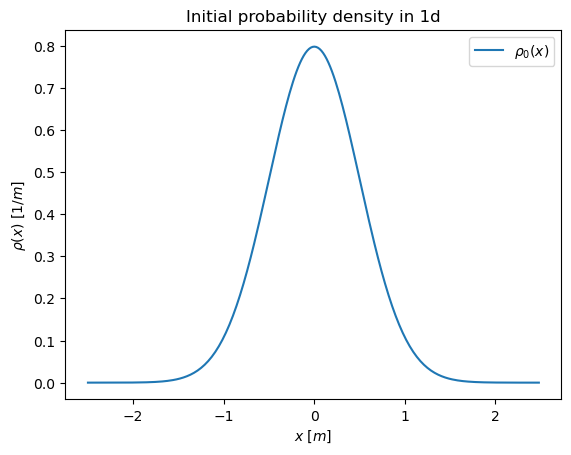

In [4]:
### define initial vector for the density (various options)
#linear spaced arrays of the domain for applying functions
dev = 0.05

#v = np.random.uniform(low=1 - dev, high=1 +  dev, size=x_nodes)

#v = np.ones(x_nodes, dtype=np.float64)

v = norm.pdf(X, 0, 0.5)

#v = norm.pdf(X, loc=-1.25, scale=0.6) + norm.pdf(x, loc=1.25, scale=0.6)

#v = vonmises.pdf(X, loc=0, kappa=4.5)

#v = vonmises.pdf(X, loc=-1.25, kappa=3) + vonmises.pdf(x, loc=1.25, kappa=3)

#v = voigt_profile(X, 0.2, 0.2)

#v = cauchy.pdf(X, loc=0, scale=0.6) #critical sigma = 0.765

#v = function_morse(X)

#v = sech_fit(x, 0.2, 2.5, 0, 0)

#v = u_store_fp[:, vmax_x-4000]

u_init = norm_array(v, dx)
u_d2 = df_dx2(u_init, dx)


fig, ax = plt.subplots()
ax.plot(X, u_init, label= r'$\rho_0(x)$')
#ax.plot(X, u_d2, label= r'$\partial_x^2 \rho_0(x)$')
#ax.set_ylim(ymin=0, ymax=1)
ax.set_xlabel(r'$x$ $[m]$')
ax.set_ylabel(r'$\rho(x)$ $[1/m]$')
ax.legend()
ax.set_title('Initial probability density in 1d')
plt.savefig(plot_dir + 'Init_PDF_1d.pdf')
plt.show()

/home/freddy/Dokumente/work/Studium/Masterarbeit/Paper/Code_Paper/modules/potential.py:175: RuntimeWarning: invalid value encountered in divide
  force = ((-c_a*np.sinh((np.abs(dist)-L/2)/l_a)*dist)/(l_a*np.sinh(L/(2*l_a))*np.abs(dist))) + ((c_r*np.sinh((np.abs(dist)-L/2)/l_r)*dist)/(l_r*np.sinh(L/(2*l_r))*np.abs(dist)))
/home/freddy/Dokumente/work/Studium/Masterarbeit/Paper/Code_Paper/modules/free_energy_calc.py:90: RuntimeWarning: divide by zero encountered in log
  log_dens = np.log(cur_dens)
/home/freddy/Dokumente/work/Studium/Masterarbeit/Paper/Code_Paper/modules/free_energy_calc.py:92: RuntimeWarning: invalid value encountered in multiply
  entropy_energy[i] = 0.5*sigma**2 * dx * np.sum(cur_dens*log_dens)


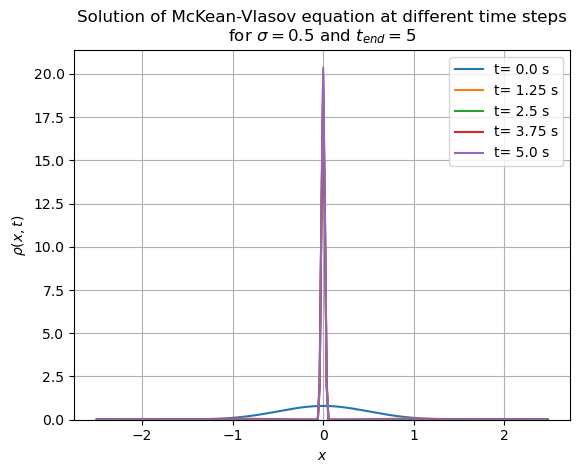

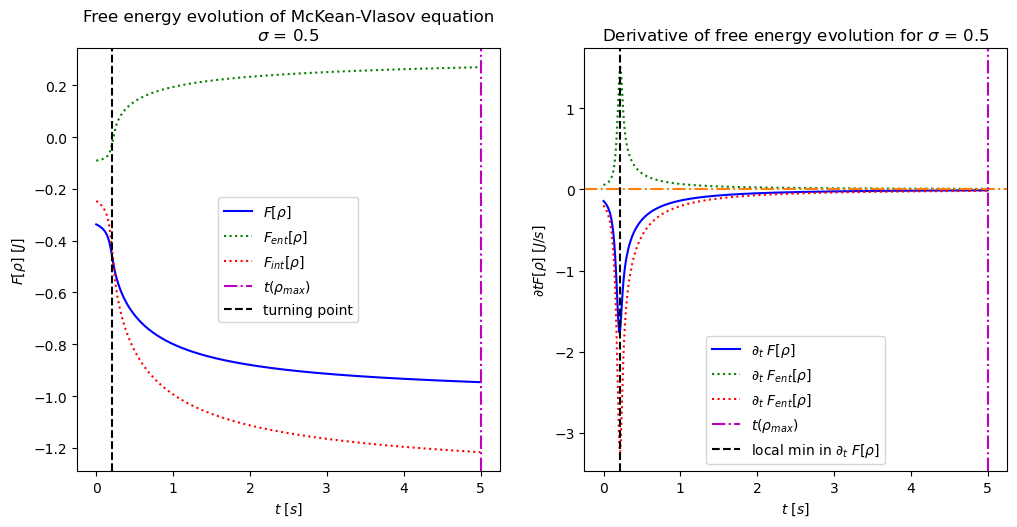

In [5]:
t_end = 5
sigma=0.5

u_store_fp, vmax_time, vmax, vmax_idx, u_max, u_end = model_simulation(u_init, sigma=sigma, t_end=t_end, c_a=c_a, l_a=l_a, c_r=c_r, l_r=l_r)
free_energy, entropy, interaction = calc_free_energy(u_store_fp, sigma=sigma)

plot_density_evolution(u_store_fp, sigma=sigma, t_end = t_end, num_curves=4, saving=False)
#plot_free_energy_without_derivative(free_energy, entropy, interaction, vmax_time, sigma=sigma, t_end=t_end, plot=True, saving=False)
min_dt_time = plot_free_energy_with_tp_clustering(free_energy, entropy, interaction, vmax_time, sigma=sigma, t_end=t_end, plot=True, saving=False)

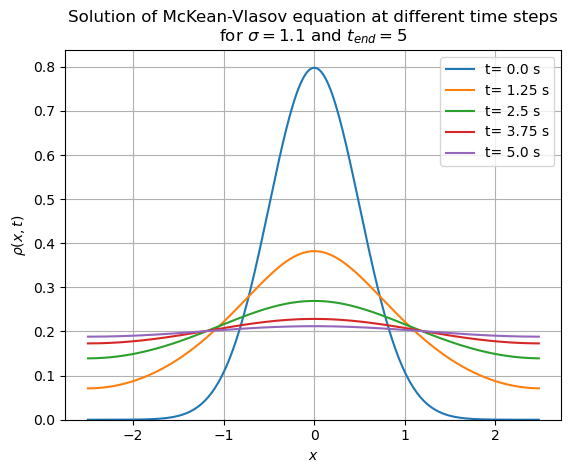

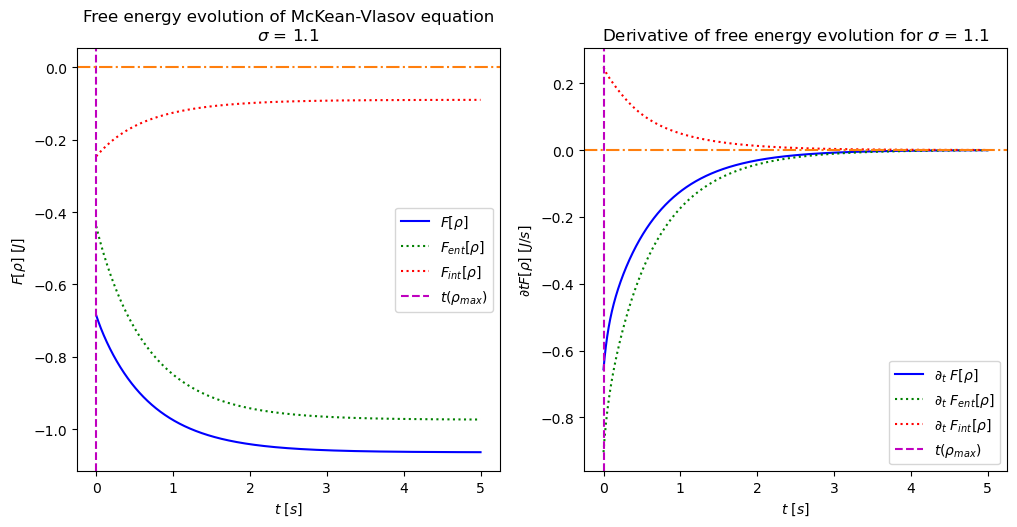

In [4]:
t_end = 5
sigma=1.1

u_store_fp, vmax_time, vmax, vmax_idx, u_max, u_end = model_simulation(u_init, sigma=sigma, t_end=t_end, c_a=c_a, l_a=l_a, c_r=c_r, l_r=l_r)
free_energy, entropy, interaction = calc_free_energy(u_store_fp, sigma=sigma)

plot_density_evolution(u_store_fp, sigma=sigma, t_end = t_end, num_curves=4, saving=False)
#plot_free_energy_without_derivative(free_energy, entropy, interaction, vmax_time, sigma=sigma, t_end=t_end, plot=True, saving=False)
min_dt_time = plot_free_energy_without_tp(free_energy, entropy, interaction, vmax_time, sigma=sigma, t_end=t_end, plot=True, saving=False)

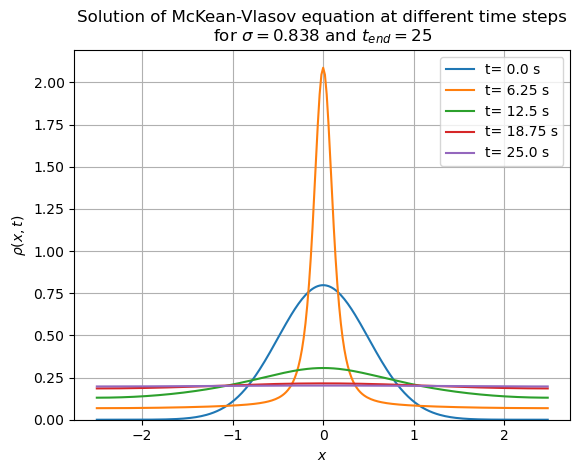

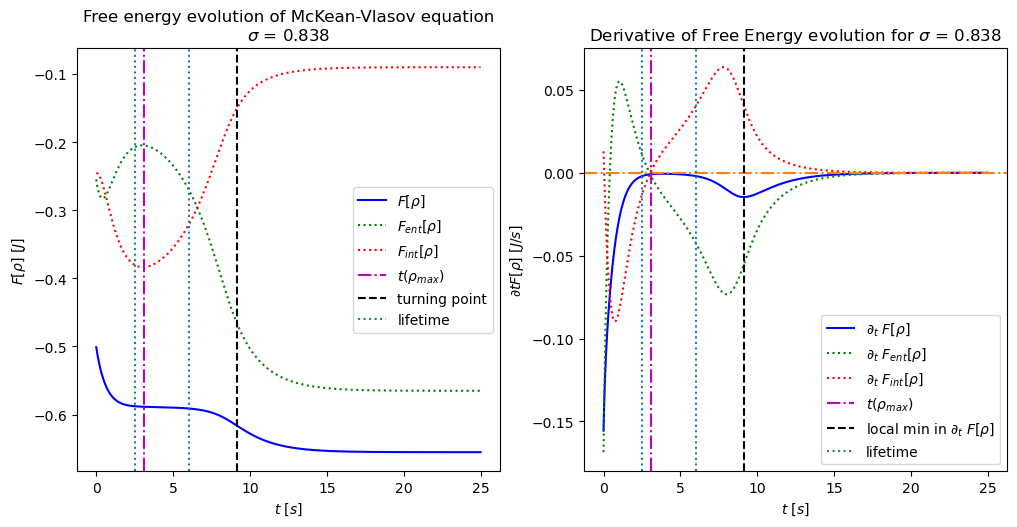

In [ ]:
t_end = 25
sigma=0.838

u_store_fp, vmax_time, vmax, vmax_idx, u_max, u_end = model_simulation(u_init, sigma=sigma, t_end=t_end, c_a=c_a, l_a=l_a, c_r=c_r, l_r=l_r)
free_energy, entropy, interaction = calc_free_energy(u_store_fp, sigma=sigma)

plot_density_evolution(u_store_fp, sigma=sigma, t_end = t_end, num_curves=4, saving=False)
#plot_free_energy_without_derivative(free_energy, entropy, interaction, vmax_time, sigma=sigma, t_end=t_end, plot=True, saving=False)
lifetime_duration = plot_free_energy_without_tp(free_energy, entropy, interaction, vmax_time, sigma=sigma, t_end=t_end, plot=True, saving=False)